In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
import seaborn as sns
%reload_ext autoreload
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *

font = {'size'   : 14}
plt.rc('font', **font)

In [3]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

In [4]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]

In [5]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    ob_id = np.arange(0,len(data))
    data.insert(0 , 'obs_id' , ob_id)
    data = data[data['flux_aper']>max_flux]
    data = data[data['flux_aper']<min_flux]
    data = data[data['flux_aper_lolim']<min_flux]
    data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>5]
    
    data = data.sample(frac=1)
    #display(data)
    data_class = data[['class']]
    data_id = data['src_id']
    data_name = data['src_name']
    obs_id = data['obs_id']
    data_val = data.drop(columns=['flux_significance' , 'index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class' ,'src_id' ,'src_name' , 'obs_id'])
    data_sig = data[['significance']]
    #display(data_val)
    import missingno as msno
    #msno.matrix(data_val)
    #plt.show()

    data_val = data_val.replace(np.nan , 0)
    data = data.replace(np.nan , 0 )
    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        #data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / np.amax(data_val[d])
    #msno.matrix(data_val)
    #plt.show()
    
    #display(data_val)
    return data , data_val , data_class , data_id , data_sig , obs_id

In [6]:
model = keras.models.load_model('models/NN_NS_BH.mdl/')

2021-09-30 15:14:19.038295: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-30 15:14:19.038551: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-30 15:14:19.043790: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(37, 2)


(30, 2)


2021-09-30 15:14:23.182889: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-30 15:14:23.200205: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


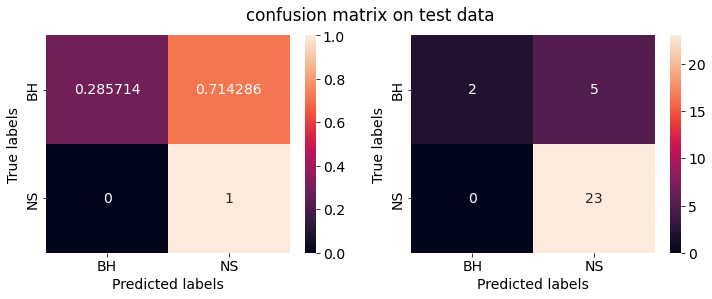

,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,significance,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,0,0,0,BH,NS,0.998977,BH0003,GINGA 1354-645,39516.5,20.86,...,13.372737,13.236872,5.1390,2.6140,76.58,54.17,0.7901,0.6270,35.2000,13.05
1,1,1,0,BH,NS,0.998615,BH0003,GINGA 1354-645,19807.2,20.86,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
2,2,2,0,BH,NS,0.998292,BH0003,GINGA 1354-645,19803.6,20.86,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
4,4,1,0,BH,NS,0.532480,BH0008,IGR J17464-3213,28362.6,6.90,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
3,3,0,0,BH,NS,0.723764,BH0008,IGR J17464-3213,22445.1,6.90,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
5,5,2,1,BH,BH,0.679181,BH0008,IGR J17464-3213,40036.9,6.90,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
13,13,0,1,BH,BH,0.653876,BH0016,CXOU J100510.0-07452,36978.6,7.77,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
1,15,1,1,NS,NS,0.998885,NS0003,1A 1743-288,38198.1,42.80,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
3,17,1,1,NS,NS,1.000000,NS0016,CEN X-4,10141.5,49.44,...,12.695725,12.631713,4.4810,2.6480,97.61,0.00,0.2000,0.1878,0.6267,0.00
2,16,0,1,NS,NS,1.000000,NS0016,CEN X-4,9561.4,49.44,...,12.310336,12.275315,2.6550,2.3550,101.60,0.00,0.2019,0.2000,0.3492,0.00


In [7]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
test_ns = pd.read_csv('processed_data/NS_test.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test_data , t_val , t_class , t_id , t_sig , t_ob_id = filter_data(test)


params_used = []
for t in t_val:
    params_used.append(t)
params_used = np.asarray(params_used)

t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
#display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)



cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
plt.show()
plt.close()




test_data_result = test_data.copy(deep=True)
y_prob = model.predict(x_test)

y_pred = []
for yi in y_prob:
    temp = [int(0)]*len(yi)
    temp[np.argmax(yi)] = int(1)
    y_pred.append(temp)
y_pred =  np.asarray(y_pred)

y_prob_val = [np.amax(yi) for yi in y_prob]
y_prob_class =[classes[np.argmax(yi)] for yi in y_prob]
y_truth = [np.dot(yi , yt) for yi , yt in zip(y_pred , one_hot_y_test)]
y_truth = np.asarray(y_truth)
test_data_result.insert(3 ,'pred_class' , y_prob_class)
test_data_result.insert(4 ,'prob' , y_prob_val)
test_data_result.insert(2 ,'is_ok' , y_truth.astype(int))

test_data_result = test_data_result.sort_values(by='src_id' , axis=0)
test_data_result.drop(columns=['index'])
display(test_data_result)
test_data_result.to_csv('pred_result/NS_BH_test.csv')

## Feature Correlation

In [8]:
param_imp = pd.DataFrame()
param_imp.insert(0,'feat' ,params_used)

cl = 0
y_prob_c1 = y_prob[:,cl]
param_corr = []
for p in params_used:
    feat_val = t_val[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , y_prob_c1)[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef' ,param_corr)

param_imp = param_imp.sort_values(by='corr_coef' , axis = 0 , ascending=False)
display(param_imp)
param_imp.to_csv('pred_result/param_imp_test.csv')




,feat,corr_coef
2,var_inter_index,0.417879
1,var_inter_prob,0.411236
11,flux_aper_hilim,0.354828
13,flux_aper,0.350541
12,flux_aper_lolim,0.331323
...,...,...
6,var_sigma,0.074570
68,hard_hs_hilim,0.071429
48,hard_hs,0.069409
10,var_index,0.037188


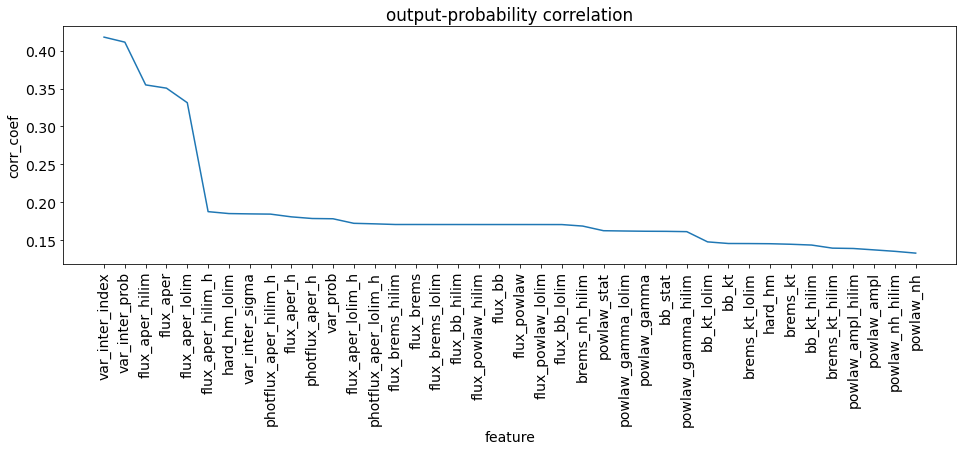

In [9]:
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(16,10))
sns.lineplot(
    data = param_imp[:40] , 
    x='feat' , y = 'corr_coef',
    )
plt.xticks(rotation=90)
plt.title('output-probability correlation')
plt.xlabel('feature')

# alternate option without .gcf
plt.subplots_adjust(bottom=0.55)
plt.savefig('pred_result/plots/output-prob-corr.jpg')
plt.show()

(370, 2)


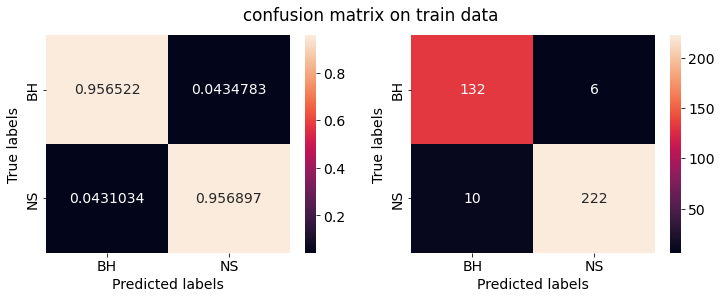

,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,significance,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,0,0,0,BH,NS,0.711532,BH0001,1A 0620-00,41932.7,23.63,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00
2,2,2,1,BH,BH,0.675852,BH0001,1A 0620-00,29673.9,23.63,...,13.083178,13.013990,4.3130,2.7990,17.89,8.830,0.6263,0.5576,0.8602,0.00
1,1,1,1,BH,BH,0.901152,BH0001,1A 0620-00,39623.0,23.63,...,13.433798,13.353400,3.1340,2.0000,15.48,6.992,0.5002,0.4332,1.0350,0.00
11,11,1,1,BH,BH,0.998520,BH0004,GRO J1655-40,18207.1,13.83,...,13.196065,13.052468,3.5500,1.9820,168.60,113.200,0.8334,0.6885,89.6000,46.56
10,10,0,1,BH,BH,0.987839,BH0004,GRO J1655-40,42550.7,13.83,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,625,8,1,NS,NS,1.000000,NS0078,1WGA J1911.2+0035,6358.4,44.36,...,11.937794,11.905180,1.0810,0.9230,51.21,45.060,0.3838,0.3539,29.4800,23.12
421,617,0,1,NS,NS,0.999983,NS0078,1WGA J1911.2+0035,6504.6,44.36,...,12.519562,12.440452,0.7413,0.5858,53.59,42.970,0.3205,0.2822,32.3000,21.72
441,637,0,1,NS,NS,0.999103,NS0083,E2259+587,24783.0,114.17,...,11.891435,11.875170,1.5250,1.4110,88.92,83.260,0.5262,0.5079,49.7400,44.93
442,638,0,1,NS,NS,0.923833,NS0084,GRO J1744-28,10619.0,5.50,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00


In [10]:
test_bh = pd.read_csv('processed_data/BH_train.csv')
test_ns = pd.read_csv('processed_data/NS_train.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test_data , t_val , t_class , t_id , t_sig , t_ob_id = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
#display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)



cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on train data')
plt.show()
plt.close()




test_data_result = test_data.copy(deep=True)
y_prob = model.predict(x_test)

y_pred = []
for yi in y_prob:
    temp = [int(0)]*len(yi)
    temp[np.argmax(yi)] = int(1)
    y_pred.append(temp)
y_pred =  np.asarray(y_pred)

y_prob_val = [np.amax(yi) for yi in y_prob]
y_prob_class =[classes[np.argmax(yi)] for yi in y_prob]
y_truth = [np.dot(yi , yt) for yi , yt in zip(y_pred , one_hot_y_test)]
y_truth = np.asarray(y_truth)
test_data_result.insert(3 ,'pred_class' , y_prob_class)
test_data_result.insert(4 ,'prob' , y_prob_val)
test_data_result.insert(2 ,'is_ok' , y_truth.astype(int))

test_data_result = test_data_result.sort_values(by='src_id' , axis=0)
test_data_result.drop(columns=['index'])
display(test_data_result)
test_data_result.to_csv('pred_result/NS_BH_train.csv')

,feat,corr_coef
11,flux_aper_hilim,0.400870
30,photflux_aper_hilim_u,0.399283
14,photflux_aper_hilim,0.336820
13,flux_aper,0.325197
1,var_inter_prob,0.319790
...,...,...
70,hard_ms_hilim,0.010354
18,photflux_aper_h,0.007937
23,photflux_aper_lolim_h,0.007109
61,bb_stat,0.004566


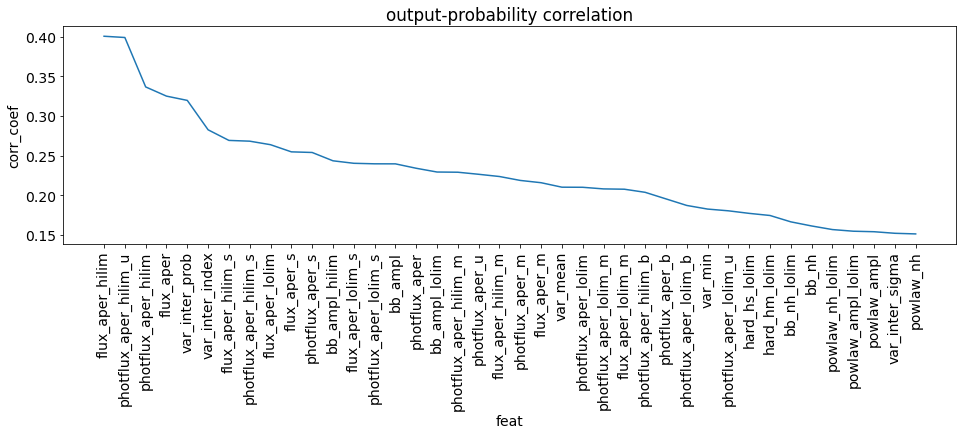

In [12]:
param_imp = pd.DataFrame()
param_imp.insert(0,'feat' ,params_used)

cl = 0
y_prob_c1 = y_prob[:,cl]
param_corr = []
for p in params_used:
    feat_val = t_val[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , y_prob_c1)[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef' ,param_corr)

param_imp = param_imp.sort_values(by='corr_coef' , axis = 0 , ascending=False)
display(param_imp)
param_imp.to_csv('pred_result/param_imp_train.csv')

fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(16,4))
sns.lineplot(
    data = param_imp[:40] , 
    x='feat' , y = 'corr_coef',
    )
plt.xticks(rotation=90)
plt.title('output-probability correlation')
plt.show()